In [1]:
library(tidyverse)
library(caret)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [2]:
sky_data <- read_csv("Skyserver.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  objid = col_double(),
  ra = col_double(),
  dec = col_double(),
  u = col_double(),
  g = col_double(),
  r = col_double(),
  i = col_double(),
  z = col_double(),
  run = col_double(),
  rerun = col_double(),
  camcol = col_double(),
  field = col_double(),
  specobjid = col_double(),
  class = col_character(),
  redshift = col_double(),
  plate = col_double(),
  mjd = col_double(),
  fiberid = col_double()
)




In [3]:
sky_data %>% head()
sky_data %>% summary()

objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1.23765e+18,183.5313,0.08969303,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.72236e+18,STAR,-0.000008960,3306,54922,491
1.23765e+18,183.5984,0.13528503,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.63814e+17,STAR,-0.000054900,323,51615,541
1.23765e+18,183.6802,0.12618509,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.23274e+17,GALAXY,0.123111200,287,52023,513
1.23765e+18,183.8705,0.04991069,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.72237e+18,STAR,-0.000110616,3306,54922,510
1.23765e+18,183.8833,0.10255675,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.72237e+18,STAR,0.000590357,3306,54922,512
1.23765e+18,183.8472,0.17369416,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.64955e+17,STAR,0.000314603,324,51666,594


     objid                 ra               dec                u        
 Min.   :1.238e+18   Min.   :  8.235   Min.   :-5.3826   Min.   :12.99  
 1st Qu.:1.238e+18   1st Qu.:157.371   1st Qu.:-0.5390   1st Qu.:18.18  
 Median :1.238e+18   Median :180.395   Median : 0.4042   Median :18.85  
 Mean   :1.238e+18   Mean   :175.530   Mean   :14.8361   Mean   :18.62  
 3rd Qu.:1.238e+18   3rd Qu.:201.547   3rd Qu.:35.6494   3rd Qu.:19.26  
 Max.   :1.238e+18   Max.   :260.884   Max.   :68.5423   Max.   :19.60  
       g               r               i               z              run      
 Min.   :12.80   Min.   :12.43   Min.   :11.95   Min.   :11.61   Min.   : 308  
 1st Qu.:16.82   1st Qu.:16.17   1st Qu.:15.85   1st Qu.:15.62   1st Qu.: 752  
 Median :17.50   Median :16.86   Median :16.55   Median :16.39   Median : 756  
 Mean   :17.37   Mean   :16.84   Mean   :16.58   Mean   :16.42   Mean   : 981  
 3rd Qu.:18.01   3rd Qu.:17.51   3rd Qu.:17.26   3rd Qu.:17.14   3rd Qu.:1331  
 Max.   :

In [4]:
sky_data %>% filter(class == "STAR") %>% nrow()

[1] 4152

In [5]:
unique(sky_data$class)

[1] "STAR"   "GALAXY" "QSO"

In [6]:
set.seed(1)
training <-sample(1:nrow(sky_data), size = nrow(sky_data) * 0.5)
testing <- dplyr::setdiff(1:nrow(sky_data), training)
skyTrain <- sky_data[training, ]
skyTest <- sky_data[testing, ]

str(skyTrain)
# Predictor information here https://www.sdss.org/dr12/algorithms/magnitudes/

tibble [5,000 × 18] (S3: tbl_df/tbl/data.frame)
 $ objid    : num [1:5000] 1.24e+18 1.24e+18 1.24e+18 1.24e+18 1.24e+18 ...
 $ ra       : num [1:5000] 149.3 184.7 182.5 166.2 16.1 ...
 $ dec      : num [1:5000] 0.22 -0.376 -3.531 0.283 14.504 ...
 $ u        : num [1:5000] 18.4 18.9 19.3 17.8 18 ...
 $ g        : num [1:5000] 17 18.8 18.1 16.9 16.1 ...
 $ r        : num [1:5000] 16.4 18.6 17.5 16.6 15.2 ...
 $ i        : num [1:5000] 16.1 18.4 17.2 16.5 14.8 ...
 $ z        : num [1:5000] 15.9 18.3 17 16.4 14.5 ...
 $ run      : num [1:5000] 756 752 1140 756 1035 ...
 $ rerun    : num [1:5000] 301 301 301 301 301 301 301 301 301 301 ...
 $ camcol   : num [1:5000] 4 3 1 4 3 3 6 2 4 1 ...
 $ field    : num [1:5000] 224 275 197 336 69 333 34 481 213 357 ...
 $ specobjid: num [1:5000] 3.23e+18 3.24e+17 3.74e+17 4.32e+18 4.74e+17 ...
 $ class    : chr [1:5000] "STAR" "QSO" "GALAXY" "STAR" ...
 $ redshift : num [1:5000] 0.000102 1.516544 0.099229 0.00058 0.040923 ...
 $ plate    : num [1:500

In [7]:
trctrl <- trainControl(method = "repeatedcv", 
                       number = 10, 
                       repeats = 3)

set.seed(2020)

knn_fit1 <- train(class ~ u + g + r + i + z, 
                 data = skyTrain,
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

In [8]:
knn_fit1

k-Nearest Neighbors 

5000 samples
   5 predictor
   3 classes: 'GALAXY', 'QSO', 'STAR' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4499, 4500, 4501, 4500, 4499, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.9066052  0.8355256
   3  0.9185325  0.8566090
   4  0.9127990  0.8465682
   5  0.9139338  0.8486365
   6  0.9097969  0.8413250
   7  0.9085980  0.8392413
   8  0.9042636  0.8316272
   9  0.9028653  0.8291616
  10  0.9000640  0.8242688
  11  0.8997314  0.8236574
  12  0.8965314  0.8179944
  13  0.8971312  0.8190863
  14  0.8957319  0.8166141
  15  0.8931979  0.8121594
  16  0.8923310  0.8105921
  17  0.8909323  0.8081171
  18  0.8897981  0.8061751
  19  0.8880627  0.8030073
  20  0.8853274  0.7982269
  21  0.8845963  0.7969479
  22  0.8823307  0.7929797
  23  0.8811315  0.7908585
  24  0.8797322  0.7883771
  25  0.8785318  0.7862602
  26  0.8761973  0.78213

In [14]:
set.seed(1)
knn_pred1 <- predict(knn_fit1, newdata = skyTest)
knn_misclass <- sum(knn_pred1 != skyTest$class)/nrow(skyTest)

sprintf("The knn misclassification rate is %0.3f" , knn_misclass)

[1] "The knn misclassification rate is 0.082"

CART 

5000 samples
   5 predictor
   3 classes: 'GALAXY', 'QSO', 'STAR' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4499, 4501, 4499, 4500, 4500, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa     
  0.00  0.8750061  0.77933455
  0.01  0.7817217  0.61273252
  0.02  0.7355313  0.52930949
  0.03  0.7201973  0.50518948
  0.04  0.7095298  0.48478809
  0.05  0.6959309  0.45956531
  0.06  0.6750668  0.43241105
  0.07  0.6719982  0.42937166
  0.08  0.6719982  0.42937166
  0.09  0.6279929  0.31616714
  0.10  0.6029260  0.23668235
  0.11  0.5949402  0.20785352
  0.12  0.5897358  0.19082310
  0.13  0.5897358  0.19082310
  0.14  0.5897358  0.19082310
  0.15  0.5897358  0.19082310
  0.16  0.5611234  0.12272999
  0.17  0.5179302  0.01528356
  0.18  0.5179302  0.01528356
  0.19  0.5122006  0.00000000
  0.20  0.5122006  0.00000000
  0.21  0.5122006  0.00000000
  0.22  0.5122006  0.000

[1] 0.1246




|       | GALAXY| QSO| STAR|
|:------|------:|---:|----:|
|GALAXY |   2174|  46|  237|
|QSO    |     17| 366|   51|
|STAR   |    246|  26| 1837|

[1] 4377

[1] "The tree misclassification rate is 0.125"

[1] "The total correct predictions are 4377"

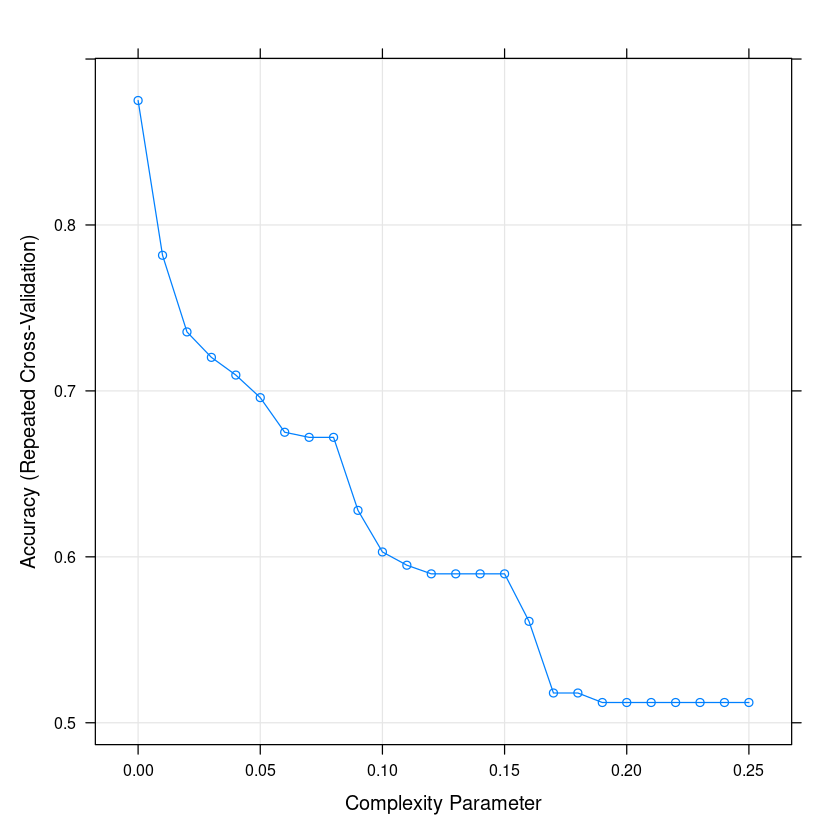

In [15]:
set.seed(1)

tree_fit <- train(class ~ u + g + r + i + z, 
                  data = skyTrain,
                  method = "rpart", 
                  trControl = trctrl, 
                  preProcess = c("center", "scale"),
                  tuneGrid = data.frame(cp = seq(0,0.25,0.01)))

tree_fit
plot(tree_fit)

tree_pred <- predict(tree_fit, newdata = skyTest)

tree_misclass <- sum(tree_pred != skyTest$class) / nrow(skyTest)

print(tree_misclass)

tree_con_tab <- table(tree_pred, skyTest$class)

knitr::kable(tree_con_tab)

sum(diag(tree_con_tab))

tree_misclass <- sum(tree_pred != skyTest$class) / nrow(skyTest)

sprintf("The tree misclassification rate is %0.3f" , tree_misclass)

sprintf("The total correct predictions are %d", sum(diag(tree_con_tab)))